# Introduction
Hello people, welcome to my kernel! In this kernel I am going to predict whether pokemons are legendary. In order to predict, I am going to use KNN and Logistic Regression, after predictions I am going to compare scores of them.

Let's take a look at our schedule

# Schedule
1. General Knowledge about Pokemon
1. Importing Libraries and Data
1. Having An Idea About The Data
    * Explanation of Features
1. Simple Exploratory Data Analysis
1. Preparing Dataset For Machine Learning
    * Dropping Unnecesary Features
    * Converting Legendary Feature to Int64
    * Converting Type Features to Int64
    * Value Normalizing
    * Train - Test Splitting
1. Legendary Prediction using KNN Algorithm with SKLearn
1. Legendary Prediction using Logistic Regression with SKLearn
1. Conclusion

# General Knowledge About Pokemon

Pokémon are creatures of all shapes and sizes who live in the wild or alongside humans. For the most part, Pokémon do not speak except to utter their names. There are currently more than 700 creatures that inhabit the Pokémon universe.

*from nintendo.com*

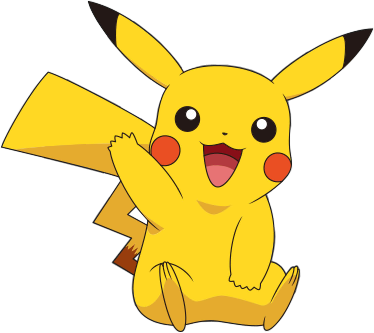

*an instance for pokemons (pikachu)*

# Importing Libraries and Data
In this section I am going to import libraries and data that I will need I am going to import these libraries

**Data Manipulating** : Pandas

**Math and Machine Learning** : Numpy, SKLearn

**Data Visualization**: matplotlib,seaborn,plotly

**Filtering Unnecesary Warnings** : warnings

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #Spliting
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.linear_model import LogisticRegression #Logistic Regression

import warnings as wrn
wrn.filterwarnings('ignore')

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In this kernel I am going to use pokemon.csv file

In [ ]:
data = pd.read_csv('/kaggle/input/pokemon-challenge/pokemon.csv')

# Having An Idea About The Data

Before the preparing, we need to take a look at the data because we cannot prepare the data without any idea :)

Therefore, I am going to use head(), info(), and isnull() functions.

In [ ]:
data.head()

In [ ]:
data.info()

## Explanation of Features

**#** : Index of pokemon

**Name** : Name of pokemon

**Type1** : First type of pokemon

**Type2** : Second type of pokemon (if that exist)

**HP** : health of pokemon

**Attack** : attack power of pokemon

**Defense** : defense power of pokemon

**Sp. Atk** : Special attack power of pokemon

**Sp. Def** : Special defence power of pokemon

**Speed** :  speed of pokemon

**Generation** : generation of pokemon ( 1 to 6)

**Legendary** : is the pokemon legendary?


In [ ]:
data.isnull().sum()

# Simple Exploratory Data Analyses

In this section I am going to do some EDA. I am going to start with a count plot. I want to see how many legendary pokemons are in this dataset. I am going to use seaborn for this.

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(data.Legendary,ax=ax)
plt.show()

* As we can see legendary pokemons are very rare. 

And now I want to see how many legendary pokemons are in this dataset by type1 feature


In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(data.Legendary,hue=data["Type 1"],ax=ax)
plt.show()

And now I want to see the correlation between features. In order to do this I am going to use seaborn library's heatmap.

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=1.5)
plt.show()


* As we can see there is not strong correlation from 0.51

# Preparing Dataset for Machine Learning

In this section I am going to prepare data for machine learning.

## Dropping Unnecesary Features

You know, there are unnecesary features in our dataset like index. In this sub-section I am going to drop them


In [ ]:
data.drop(["Name","#"],axis=1,inplace=True)


In [ ]:
data.head()

## Converting Legendary Feature to Int64 

In this sub-section I am going to convert legendary feature to int64. 

In [ ]:
data.Legendary = data.Legendary.astype(int)

In [ ]:
data.head()

## Converting Type Features to Int64

In this sub-section I am going to convert type1 and type2 feature to int64, In order to do this I am going to give a number of each type. Like; Grass => 1 Fire => 2 

In [ ]:
type1 = list(data["Type 1"].unique())
type2 = list(data["Type 2"].unique())
type2.remove(np.nan)


print(type1,"\n")
print(type2)


In [ ]:
type1 = list(zip(type1,[i for i in range(1,len(type1)+1)]))
type2 = list(zip(type2,[i for i  in range(1,len(type2)+1)]))

print(type1,"\n")
print(type2)

In [ ]:
data2 = data.copy()
type1_list = [i for i in range(0,len(data))]
for type_,value in type1:
    
    index = data[data["Type 1"] == type_].index.values
    for ind in index:
        type1_list[ind] = value

        
type2_list = [0 if type(each)==type(np.nan) else each for each in data["Type 2"]]

for type_,value in type2:
    
    index = data[data["Type 2"] == type_].index.values
    for ind in index:
        type2_list[ind] = value

In [ ]:
print(type1_list[0:10])

print(type2_list[0:10])

In [ ]:
data["Type 1"] = type1_list
data["Type 2"] = type2_list
data.head()

In [ ]:
data.dtypes

## Value Normalizing

In this sub section I am going to normalize the values, because if we do not normalize values, there will be problems in our model

In [ ]:
data = (data-np.min(data)) / (np.max(data)-np.min(data))
data.head()

## Train Test Split

In this sub-section I am going to split dataframe two pieces, train and test

In [ ]:
x = data.drop("Legendary",axis=1)
y = data["Legendary"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Legendary Prediction using KNN Algorithm with SKLearn

In this section I am going to create a KNN Algorithm using our x_train and y_train arrays.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)

print(knn.score(x_test,y_test))

Our KNN score is %93. And now I am going to create a new model. In this new model, I am going to drop Type features. I am going to do this because  I want to see how much converted types affect our model.

In [ ]:
data2.head() # It is a copy of dataset
x2 = data2.drop(["Type 1","Type 2","Legendary"],axis=1) # I am going to drop them
y2 = data2.Legendary
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=1)

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(x_train2,y_train2)
print(knn2.score(x_test2,y_test2))


# Legendary Prediction using Logistic Regression with SKLearn

We've tried KNN and now time to try logistic regression. In this section I am going to create a logistic regression model. I am going to use my first train-test split's arrays.

In [ ]:
lr = LogisticRegression() #I've created my model using SKLearn

lr.fit(x_train,y_train) # I've trained my model with my arrays

print(lr.score(x_test,y_test)) #I've tested my model 

As we can see, score is same with KNN, it is interesting, I am a beginner in machine learning and I was expecting a different score than others. 

*You can write a comment about this, I was surprised.*

# Conclusion

Thanks for your attention, if you leave a comment and upvote I will be happy.

*Please contact me if there is a problem in this kernel (like language problems)*